In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<b>Je reste sur le périmètre défini initialement à savoir movies et tv movies non short : </b>

In [2]:
basic_DF = pd.read_csv('D:/Data analyst/Wild code school/Projets/Projet 2 - Pandas/BD/Christophe_DataFrame.csv', sep = ',')

In [3]:
film1 = basic_DF[basic_DF.titleType.isin (['movie', 'tvMovie'])]

In [4]:
film2 = film1[film1["genres"].apply(lambda x:x not in ['short'])]

In [6]:
film2.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0011216,movie,Spanish Fiesta,La fête espagnole,0,2019,\N,67,Drama
1,tt0011801,movie,Tötet nicht mehr,Tötet nicht mehr,0,2019,\N,\N,"Action,Crime"
2,tt0015414,movie,La tierra de los toros,La tierra de los toros,0,2000,\N,60,\N
3,tt0015724,movie,Dama de noche,Dama de noche,0,1993,\N,102,"Drama,Mystery,Romance"
4,tt0016906,movie,Frivolinas,Frivolinas,0,2014,\N,80,"Comedy,Musical"


<b> Dans akas_df je supprime les lignes ou la region n'est pas connue. Je vais une jointure avec film2 sur le titre original </b>
    

In [5]:
akas_DF = pd.read_csv('D:/Data analyst/Wild code school/Projets/Projet 2 - Pandas/BD/title.akas.tsv', sep = '\t')

C:\Users\clefe\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
akas_DF.head(10)

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0
5,tt0000001,6,Carmencita,US,\N,imdbDisplay,\N,0
6,tt0000001,7,Carmencita,\N,\N,original,\N,1
7,tt0000001,8,カルメンチータ,JP,ja,imdbDisplay,\N,0
8,tt0000002,1,Le clown et ses chiens,\N,\N,original,\N,1
9,tt0000002,2,Le clown et ses chiens,FR,\N,imdbDisplay,\N,0


In [7]:
aVirer = akas_DF.index[akas_DF.iloc[:,3].isnull()]

In [8]:
akas_DF.drop(aVirer,0, inplace=True)

C:\Users\clefe\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [16]:
akas_DF.head(10)

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0
5,tt0000001,6,Carmencita,US,\N,imdbDisplay,\N,0
6,tt0000001,7,Carmencita,\N,\N,original,\N,1
7,tt0000001,8,カルメンチータ,JP,ja,imdbDisplay,\N,0
8,tt0000002,1,Le clown et ses chiens,\N,\N,original,\N,1
9,tt0000002,2,Le clown et ses chiens,FR,\N,imdbDisplay,\N,0


In [9]:
aVirer2 = akas_DF.index[akas_DF.iloc[:,3] == (r'\N')]

In [10]:
akas_DF.drop(aVirer2,0, inplace=True)

C:\Users\clefe\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [19]:
akas_DF.head(10)

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0
5,tt0000001,6,Carmencita,US,\N,imdbDisplay,\N,0
7,tt0000001,8,カルメンチータ,JP,ja,imdbDisplay,\N,0
9,tt0000002,2,Le clown et ses chiens,FR,\N,imdbDisplay,\N,0
10,tt0000002,3,A bohóc és kutyái,HU,\N,imdbDisplay,\N,0
11,tt0000002,4,Der Clown und seine Hunde,DE,\N,\N,literal title,0


In [11]:
merge_pays = film2.merge(akas_DF, how = 'left', left_on = 'tconst', right_on = 'titleId')

In [12]:
merge_pays.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0011216,movie,Spanish Fiesta,La fête espagnole,0,2019,\N,67,Drama,tt0011216,2.0,La fête espagnole,FR,\N,imdbDisplay,\N,0
1,tt0011216,movie,Spanish Fiesta,La fête espagnole,0,2019,\N,67,Drama,tt0011216,3.0,Swieto hiszpanskie,PL,\N,imdbDisplay,\N,0
2,tt0011216,movie,Spanish Fiesta,La fête espagnole,0,2019,\N,67,Drama,tt0011216,4.0,A Festa Espanhola,PT,\N,\N,pre-release title,0
3,tt0011216,movie,Spanish Fiesta,La fête espagnole,0,2019,\N,67,Drama,tt0011216,5.0,Spanish Fiesta,XWW,en,\N,\N,0
4,tt0011801,movie,Tötet nicht mehr,Tötet nicht mehr,0,2019,\N,\N,"Action,Crime",tt0011801,1.0,Tötet nicht mehr,DE,\N,imdbDisplay,\N,0


<AxesSubplot:xlabel='region', ylabel='count'>

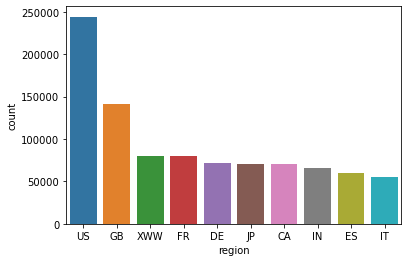

In [32]:
sns.countplot(x= 'region', data = merge_pays, order = merge_pays.region.value_counts().iloc[:10].index)

In [29]:
test = pd.DataFrame(merge_pays['region'].value_counts().head(10))
test.reset_index()

,index,region
0,US,244308
1,GB,141198
2,XWW,80203
3,FR,80101
4,DE,71199
5,JP,70649
6,CA,70210
7,IN,66115
8,ES,59371
9,IT,55414


In [17]:
test2 = merge_pays['region'].value_counts().head(10)

<AxesSubplot:>

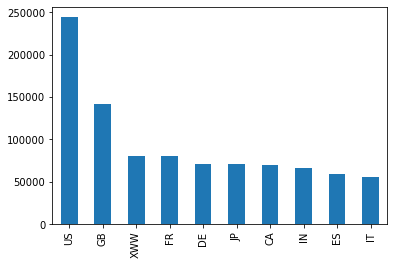

In [15]:
merge_pays['region'].value_counts().head(10).plot.bar()